# In this tutorial we'll see what to watch for during and after the network training

## Monitoring training health

First let's look at at the training history - we want to display the training set loss and vlidation set loss as a function of 'iteration' or the batch number seen by our model

In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils import plot_utils

In [3]:
%matplotlib inline

You will need to change the location of where these files are

In [4]:
loc="../model_state_dumps/20190823_072324"

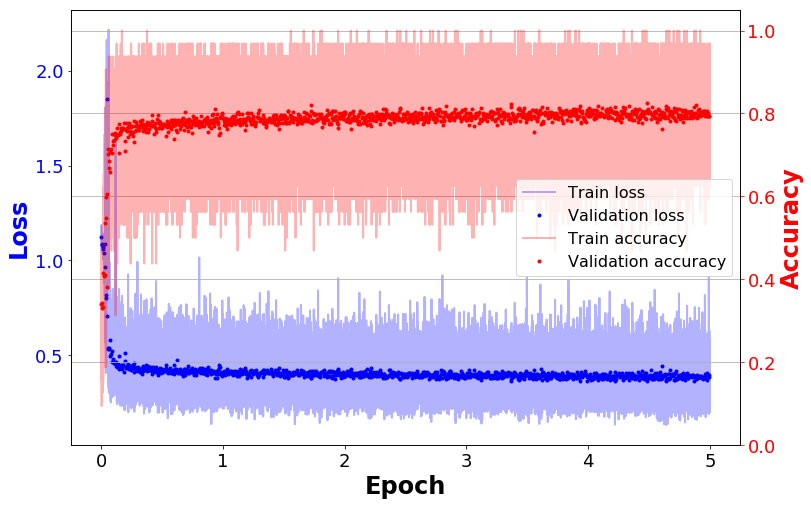

In [5]:
plot_utils.disp_learn_hist(loc)


Why so bumpy?
   - there is 'noise' associated with batch-to-batch variation BUT
   - The main effect is actually the real bumpiness in the loss landscape being traversed during learning
   
To learn anything we need to smooth out the plot - for instance by using moving average

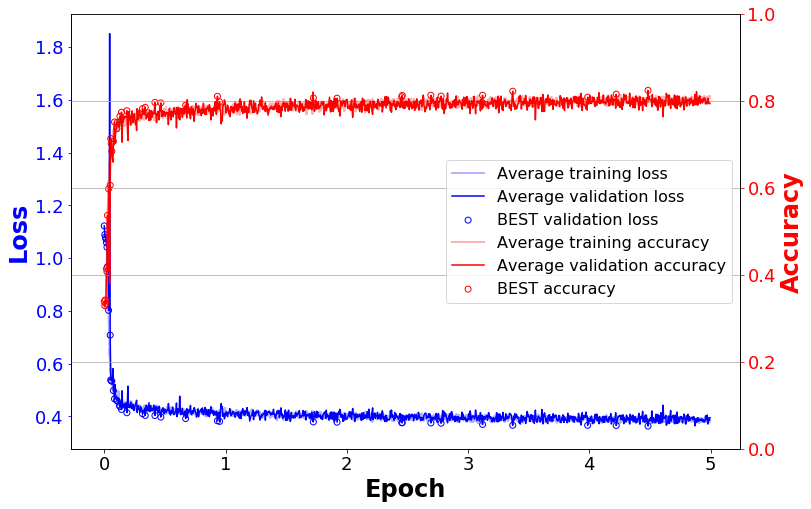

In [6]:
plot_utils.disp_learn_hist_smoothed(loc,window_train=200,window_val=1)

This actually looks pretty good - we get initially a very quick learning and then a plateau. Both training and validation loss is still decreasing slightly and tracking - which means we could probably kept on training

Let's run training on a small sample to illustrate overtraining

In [7]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [8]:
from utils.data_handling import WCH5Dataset

In [9]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [10]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=10000,val_split=0.1,test_split=0.1,transform=rotate_chan)

Reduced size: 10000


In [11]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 512
config.lr=0.01
config.device = 'gpu'
config.gpu_list = [0]
config.dump_path = '../model_state_dumps'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2

In [12]:
from utils.engine import Engine

In [13]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_091320/


In [14]:
engine.train(epochs=20,report_interval=10,valid_interval=10)

Epoch 0 Starting @ 2019-08-23 09:13:22
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.098 ... Validation Accuracy 0.338
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
best validation loss so far!: 1.0979317426681519
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.076 ... Accuracy 0.375
... Iteration 10 ... Epoch 0.04 ... Validation Loss 1.093 ... Validation Accuracy 0.326
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
best validation loss so far!: 1.092586636543274
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNNBEST.pth
... Iteration 11 ... Epoch 0.04 ... Loss 1.101 ... Accuracy 0.281
starting over on the validation set
... Iteration 20 ... Epoch 0.08 ... Validation Loss 1.092 ... Validation Accuracy 0.311
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
best validation loss so far!: 1.0923552513122559
Saved checkpoint 

starting over on the validation set
... Iteration 260 ... Epoch 1.04 ... Validation Loss 0.517 ... Validation Accuracy 0.680
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
best validation loss so far!: 0.5173423290252686
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNNBEST.pth
... Iteration 261 ... Epoch 1.04 ... Loss 0.479 ... Accuracy 0.719
... Iteration 270 ... Epoch 1.08 ... Validation Loss 1.352 ... Validation Accuracy 0.344
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 271 ... Epoch 1.08 ... Loss 1.569 ... Accuracy 0.188
starting over on the validation set
... Iteration 280 ... Epoch 1.12 ... Validation Loss 0.583 ... Validation Accuracy 0.684
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 281 ... Epoch 1.12 ... Loss 0.554 ... Accuracy 0.719
... Iteration 290 ... Epoch 1.16 ... Validation Loss 0.652 ... Validation Accuracy 0.605
Saved checkpoint as: ../model_

... Iteration 560 ... Epoch 2.24 ... Validation Loss 0.459 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 561 ... Epoch 2.24 ... Loss 0.419 ... Accuracy 0.812
... Iteration 570 ... Epoch 2.28 ... Validation Loss 0.460 ... Validation Accuracy 0.727
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 571 ... Epoch 2.28 ... Loss 0.477 ... Accuracy 0.594
starting over on the validation set
... Iteration 580 ... Epoch 2.32 ... Validation Loss 0.483 ... Validation Accuracy 0.732
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 581 ... Epoch 2.32 ... Loss 0.364 ... Accuracy 0.906
... Iteration 590 ... Epoch 2.36 ... Validation Loss 0.461 ... Validation Accuracy 0.707
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 591 ... Epoch 2.36 ... Loss 0.570 ... Accuracy 0.562
starting over on the validation set
... Iteration 60

starting over on the validation set
... Iteration 880 ... Epoch 3.52 ... Validation Loss 0.647 ... Validation Accuracy 0.633
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 881 ... Epoch 3.52 ... Loss 0.730 ... Accuracy 0.469
... Iteration 890 ... Epoch 3.56 ... Validation Loss 0.513 ... Validation Accuracy 0.684
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 891 ... Epoch 3.56 ... Loss 0.500 ... Accuracy 0.656
starting over on the validation set
... Iteration 900 ... Epoch 3.60 ... Validation Loss 0.522 ... Validation Accuracy 0.684
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 901 ... Epoch 3.60 ... Loss 0.586 ... Accuracy 0.594
... Iteration 910 ... Epoch 3.64 ... Validation Loss 0.481 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 911 ... Epoch 3.64 ... Loss 0.474 ... Accuracy 0.781
starting over on

starting over on the validation set
... Iteration 1220 ... Epoch 4.88 ... Validation Loss 0.426 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1221 ... Epoch 4.88 ... Loss 0.652 ... Accuracy 0.719
... Iteration 1230 ... Epoch 4.92 ... Validation Loss 0.490 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1231 ... Epoch 4.92 ... Loss 0.593 ... Accuracy 0.719
starting over on the validation set
... Iteration 1240 ... Epoch 4.96 ... Validation Loss 0.469 ... Validation Accuracy 0.717
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1241 ... Epoch 4.96 ... Loss 0.476 ... Accuracy 0.719
Epoch 5 Starting @ 2019-08-23 09:14:05
... Iteration 1250 ... Epoch 5.00 ... Validation Loss 0.474 ... Validation Accuracy 0.725
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1251 ... Epoch 5.00 ...

starting over on the validation set
... Iteration 1560 ... Epoch 6.24 ... Validation Loss 0.462 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1561 ... Epoch 6.24 ... Loss 0.505 ... Accuracy 0.719
... Iteration 1570 ... Epoch 6.28 ... Validation Loss 0.427 ... Validation Accuracy 0.752
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1571 ... Epoch 6.28 ... Loss 0.481 ... Accuracy 0.875
starting over on the validation set
... Iteration 1580 ... Epoch 6.32 ... Validation Loss 0.478 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1581 ... Epoch 6.32 ... Loss 0.413 ... Accuracy 0.812
... Iteration 1590 ... Epoch 6.36 ... Validation Loss 0.456 ... Validation Accuracy 0.730
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1591 ... Epoch 6.36 ... Loss 0.339 ... Accuracy 0.844
starting

starting over on the validation set
... Iteration 1880 ... Epoch 7.52 ... Validation Loss 0.435 ... Validation Accuracy 0.758
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1881 ... Epoch 7.52 ... Loss 0.336 ... Accuracy 0.875
... Iteration 1890 ... Epoch 7.56 ... Validation Loss 0.435 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1891 ... Epoch 7.56 ... Loss 0.605 ... Accuracy 0.656
starting over on the validation set
... Iteration 1900 ... Epoch 7.60 ... Validation Loss 0.461 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1901 ... Epoch 7.60 ... Loss 0.395 ... Accuracy 0.781
... Iteration 1910 ... Epoch 7.64 ... Validation Loss 0.427 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 1911 ... Epoch 7.64 ... Loss 0.489 ... Accuracy 0.688
starting

starting over on the validation set
... Iteration 2220 ... Epoch 8.88 ... Validation Loss 0.449 ... Validation Accuracy 0.754
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2221 ... Epoch 8.88 ... Loss 0.336 ... Accuracy 0.875
... Iteration 2230 ... Epoch 8.92 ... Validation Loss 0.424 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2231 ... Epoch 8.92 ... Loss 0.593 ... Accuracy 0.656
starting over on the validation set
... Iteration 2240 ... Epoch 8.96 ... Validation Loss 0.449 ... Validation Accuracy 0.740
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2241 ... Epoch 8.96 ... Loss 0.365 ... Accuracy 0.750
Epoch 9 Starting @ 2019-08-23 09:14:34
... Iteration 2250 ... Epoch 9.00 ... Validation Loss 0.415 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2251 ... Epoch 9.00 ...

starting over on the validation set
... Iteration 2540 ... Epoch 10.16 ... Validation Loss 0.447 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2541 ... Epoch 10.16 ... Loss 0.390 ... Accuracy 0.750
... Iteration 2550 ... Epoch 10.20 ... Validation Loss 0.425 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2551 ... Epoch 10.20 ... Loss 0.402 ... Accuracy 0.812
starting over on the validation set
... Iteration 2560 ... Epoch 10.24 ... Validation Loss 0.487 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2561 ... Epoch 10.24 ... Loss 0.421 ... Accuracy 0.750
... Iteration 2570 ... Epoch 10.28 ... Validation Loss 0.421 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2571 ... Epoch 10.28 ... Loss 0.639 ... Accuracy 0.625


starting over on the validation set
... Iteration 2880 ... Epoch 11.52 ... Validation Loss 0.488 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2881 ... Epoch 11.52 ... Loss 0.338 ... Accuracy 0.812
... Iteration 2890 ... Epoch 11.56 ... Validation Loss 0.415 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2891 ... Epoch 11.56 ... Loss 0.316 ... Accuracy 0.906
starting over on the validation set
... Iteration 2900 ... Epoch 11.60 ... Validation Loss 0.443 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2901 ... Epoch 11.60 ... Loss 0.274 ... Accuracy 0.938
... Iteration 2910 ... Epoch 11.64 ... Validation Loss 0.459 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 2911 ... Epoch 11.64 ... Loss 0.479 ... Accuracy 0.688


starting over on the validation set
... Iteration 3220 ... Epoch 12.88 ... Validation Loss 0.456 ... Validation Accuracy 0.746
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3221 ... Epoch 12.88 ... Loss 0.331 ... Accuracy 0.844
... Iteration 3230 ... Epoch 12.92 ... Validation Loss 0.431 ... Validation Accuracy 0.762
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3231 ... Epoch 12.92 ... Loss 0.419 ... Accuracy 0.844
starting over on the validation set
... Iteration 3240 ... Epoch 12.96 ... Validation Loss 0.508 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3241 ... Epoch 12.96 ... Loss 0.534 ... Accuracy 0.781
Epoch 13 Starting @ 2019-08-23 09:15:03
... Iteration 3250 ... Epoch 13.00 ... Validation Loss 0.444 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3251 ... Epoch 

starting over on the validation set
... Iteration 3560 ... Epoch 14.24 ... Validation Loss 0.497 ... Validation Accuracy 0.738
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3561 ... Epoch 14.24 ... Loss 0.240 ... Accuracy 0.969
... Iteration 3570 ... Epoch 14.28 ... Validation Loss 0.418 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3571 ... Epoch 14.28 ... Loss 0.425 ... Accuracy 0.812
starting over on the validation set
... Iteration 3580 ... Epoch 14.32 ... Validation Loss 0.468 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3581 ... Epoch 14.32 ... Loss 0.466 ... Accuracy 0.719
... Iteration 3590 ... Epoch 14.36 ... Validation Loss 0.509 ... Validation Accuracy 0.766
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3591 ... Epoch 14.36 ... Loss 0.252 ... Accuracy 0.906


starting over on the validation set
... Iteration 3900 ... Epoch 15.60 ... Validation Loss 0.497 ... Validation Accuracy 0.750
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3901 ... Epoch 15.60 ... Loss 0.417 ... Accuracy 0.750
... Iteration 3910 ... Epoch 15.64 ... Validation Loss 0.483 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3911 ... Epoch 15.64 ... Loss 0.408 ... Accuracy 0.781
starting over on the validation set
... Iteration 3920 ... Epoch 15.68 ... Validation Loss 0.587 ... Validation Accuracy 0.732
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3921 ... Epoch 15.68 ... Loss 0.738 ... Accuracy 0.719
... Iteration 3930 ... Epoch 15.72 ... Validation Loss 0.560 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 3931 ... Epoch 15.72 ... Loss 0.532 ... Accuracy 0.781


starting over on the validation set
... Iteration 4240 ... Epoch 16.96 ... Validation Loss 0.464 ... Validation Accuracy 0.750
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4241 ... Epoch 16.96 ... Loss 0.343 ... Accuracy 0.844
Epoch 17 Starting @ 2019-08-23 09:15:32
... Iteration 4250 ... Epoch 17.00 ... Validation Loss 0.485 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4251 ... Epoch 17.00 ... Loss 0.247 ... Accuracy 0.906
starting over on the validation set
... Iteration 4260 ... Epoch 17.04 ... Validation Loss 0.573 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4261 ... Epoch 17.04 ... Loss 0.471 ... Accuracy 0.688
... Iteration 4270 ... Epoch 17.08 ... Validation Loss 0.512 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4271 ... Epoch 

starting over on the validation set
... Iteration 4580 ... Epoch 18.32 ... Validation Loss 0.585 ... Validation Accuracy 0.744
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4581 ... Epoch 18.32 ... Loss 0.402 ... Accuracy 0.781
... Iteration 4590 ... Epoch 18.36 ... Validation Loss 0.472 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4591 ... Epoch 18.36 ... Loss 0.172 ... Accuracy 0.969
starting over on the validation set
... Iteration 4600 ... Epoch 18.40 ... Validation Loss 0.576 ... Validation Accuracy 0.734
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4601 ... Epoch 18.40 ... Loss 0.222 ... Accuracy 0.938
... Iteration 4610 ... Epoch 18.44 ... Validation Loss 0.489 ... Validation Accuracy 0.756
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4611 ... Epoch 18.44 ... Loss 0.188 ... Accuracy 0.938


starting over on the validation set
... Iteration 4920 ... Epoch 19.68 ... Validation Loss 0.596 ... Validation Accuracy 0.746
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4921 ... Epoch 19.68 ... Loss 0.300 ... Accuracy 0.844
... Iteration 4930 ... Epoch 19.72 ... Validation Loss 0.546 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4931 ... Epoch 19.72 ... Loss 0.206 ... Accuracy 0.938
starting over on the validation set
... Iteration 4940 ... Epoch 19.76 ... Validation Loss 0.617 ... Validation Accuracy 0.738
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4941 ... Epoch 19.76 ... Loss 0.311 ... Accuracy 0.844
... Iteration 4950 ... Epoch 19.80 ... Validation Loss 0.552 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190823_091320/SimpleCNN.pth
... Iteration 4951 ... Epoch 19.80 ... Loss 0.339 ... Accuracy 0.844


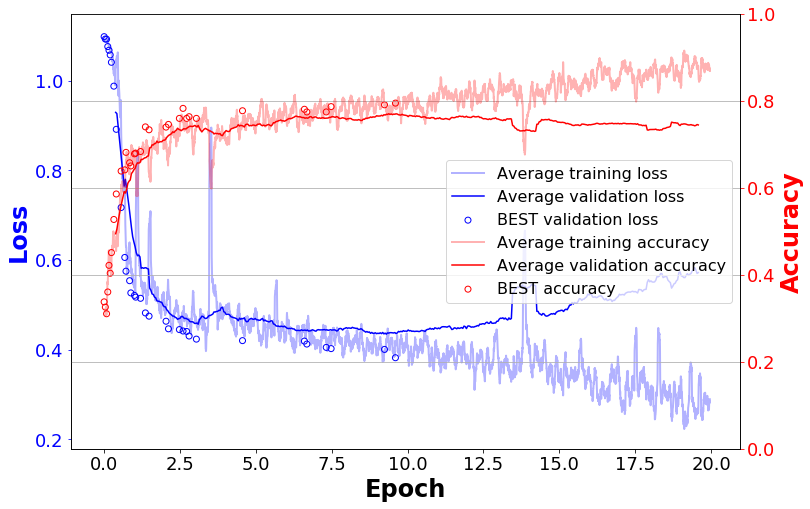

In [15]:
loc="../model_state_dumps/20190823_091320"
plot_utils.disp_learn_hist_smoothed(loc,window_train=20,window_val=20)

Now this clearly shows overtraining - validation loss starts to climb. Possibly other pathologies

## Evaluating model performance in classification task

Now let's go back to the full dataset and load the model trained last time on the full dataset

In [16]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [17]:
!ls ../model_state_dumps/20190823_072324

config_log.txt	log_train.csv  log_val.csv  SimpleCNNBEST.pth  SimpleCNN.pth


In [18]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190823_092458/


In [19]:
engine.restore_state("../model_state_dumps/20190823_072324/SimpleCNNBEST.pth")

Restoring state from ../model_state_dumps/20190823_072324/SimpleCNNBEST.pth
Restoration complete.


In [20]:
engine.dirpath="../model_state_dumps/20190823_072324"

In [21]:
engine.validate()

val_iterations : 0
val_iterations : 1
val_iterations : 2
val_iterations : 3
val_iterations : 4
val_iterations : 5
val_iterations : 6
val_iterations : 7
val_iterations : 8
val_iterations : 9
val_iterations : 10
val_iterations : 11
val_iterations : 12
val_iterations : 13
val_iterations : 14
val_iterations : 15
val_iterations : 16
val_iterations : 17
val_iterations : 18
val_iterations : 19
val_iterations : 20
val_iterations : 21
val_iterations : 22
val_iterations : 23
val_iterations : 24
val_iterations : 25
val_iterations : 26
val_iterations : 27
val_iterations : 28
val_iterations : 29
val_iterations : 30
val_iterations : 31
val_iterations : 32
val_iterations : 33
val_iterations : 34
val_iterations : 35
val_iterations : 36
val_iterations : 37
val_iterations : 38
val_iterations : 39
val_iterations : 40
val_iterations : 41
val_iterations : 42
val_iterations : 43
val_iterations : 44
val_iterations : 45
val_iterations : 46
val_iterations : 47
val_iterations : 48
val_iterations : 49
val_iterat

### Examination of classifier output

Plot the classifier softmax output for various classes and outputs

In [22]:
labels_val=np.load(engine.dirpath + "labels.npy")
predictions_val=np.load(engine.dirpath + "predictions.npy")
softmax_out_val=np.load(engine.dirpath + "softmax.npy")

In [23]:
from matplotlib import pyplot as plt
def plot_resp(labels,softmax_out):
    fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
    ax1.tick_params(axis="both", labelsize=20)
    softmax_out_val_gamma_Pe=softmax_out_val[labels_val==0][:,1]
    softmax_out_val_e_Pe=softmax_out_val[labels_val==1][:,1]
    
    bins=np.linspace(0.0,1.0,51)
    values, bins, patches = ax1.hist(softmax_out_val_gamma_Pe, bins=bins, 
                                    label= 'gamma', color='blue', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax1.hist(softmax_out_val_e_Pe, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3)
    ax1.legend(prop={'size': 16})
    ax1.set_xlabel('$P(e)$',fontweight='bold',fontsize=24,color='black')
    
    fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
    ax2.tick_params(axis="both", labelsize=20)
    softmax_out_val_e_Pmu=softmax_out_val[labels_val==1][:,2]
    softmax_out_val_mu_Pmu=softmax_out_val[labels_val==2][:,2]
    
    values, bins, patches = ax2.hist(softmax_out_val_mu_Pmu, bins=bins, 
                                    label= 'muon', color='green', density=True,
                                    alpha=0.3)
    
    values, bins, patches = ax2.hist(softmax_out_val_e_Pmu, bins=bins, 
                                    label= 'electron', color='red', density=True,
                                    alpha=0.3, log=True)
    ax2.legend(prop={'size': 16})
    ax2.set_xlabel('$P(\mu)$',fontweight='bold',fontsize=24,color='black')
    
    
    
    plt.show()

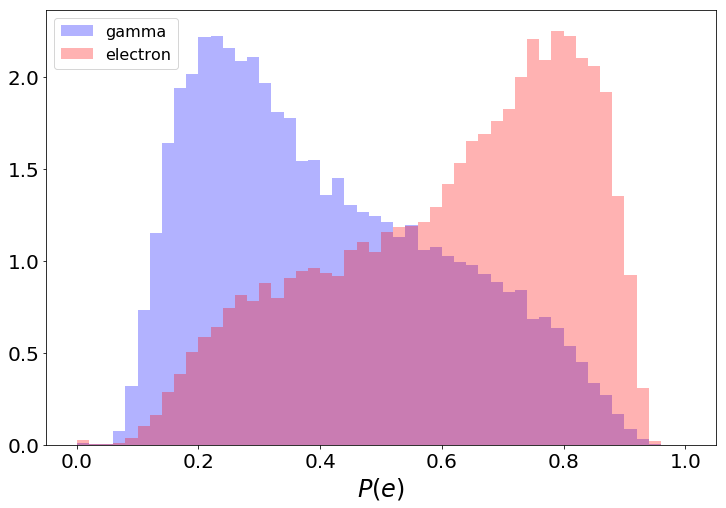

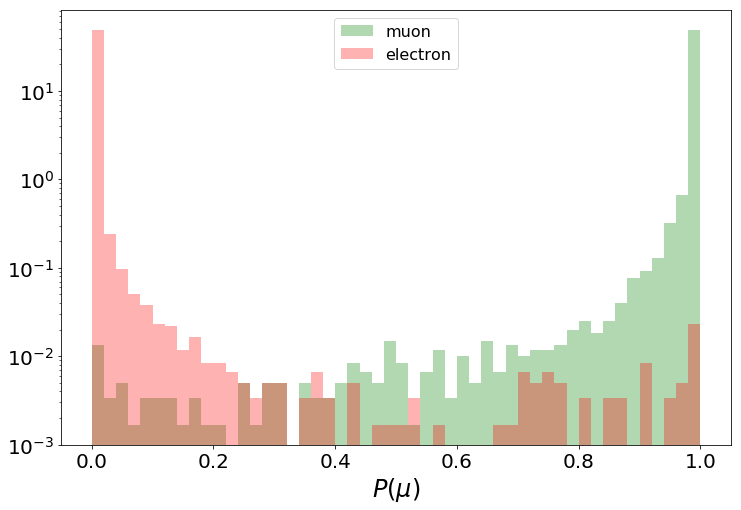

In [22]:
plot_resp(labels_val,softmax_out_val)

### The confusion matrix

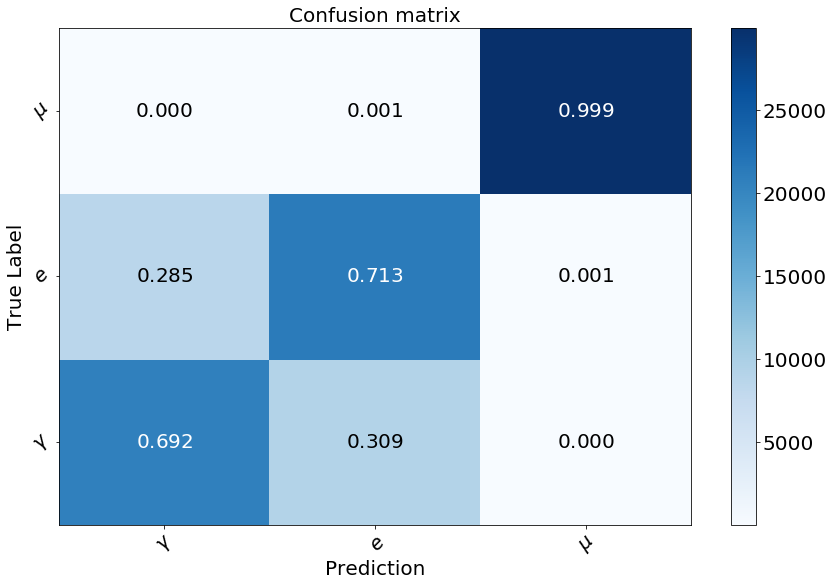

In [24]:
plot_utils.plot_confusion_matrix(labels_val, predictions_val, ['$\gamma$','$e$','$\mu$'])

### Receiver Operating Characteristic
   - We will plot ROC treating electrons as 'signal' and photons as 'background', but we have also muons - which is also a signal, so we have more reasonable possibilities of plotting ROC curves - can you name advantages and disadvantages?

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


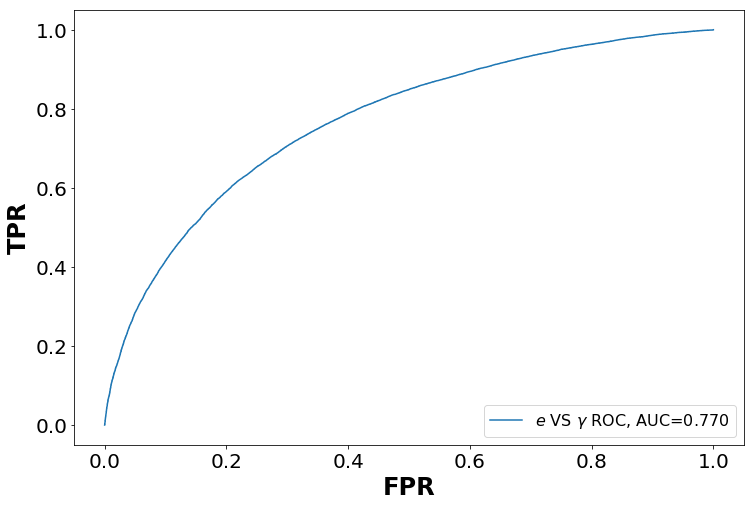

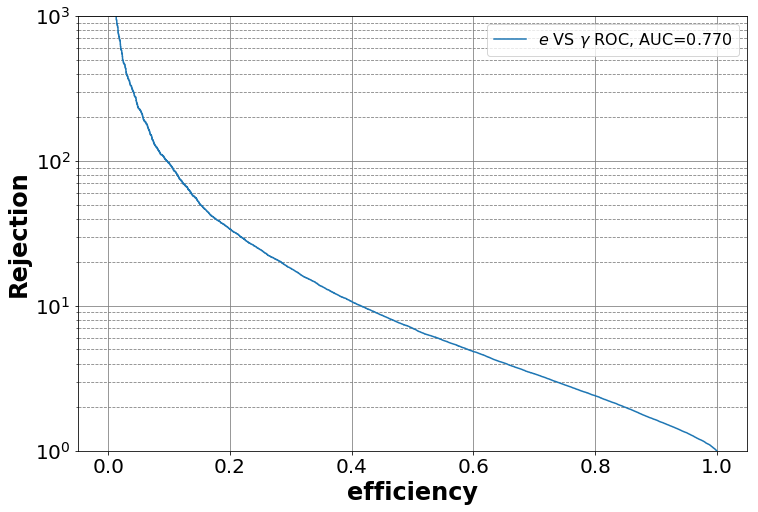

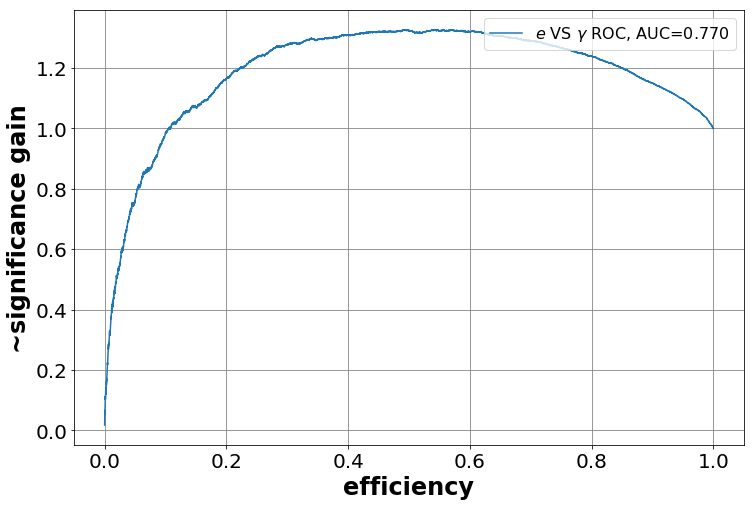

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
labels_val_e_gamma=labels_val[np.where( (labels_val==0) | (labels_val==1))]
softmax_out_val_e_gamma=softmax_out_val[np.where( (labels_val==0) | (labels_val==1))][:,1]
fpr,tpr,thr=roc_curve(labels_val_e_gamma,softmax_out_val_e_gamma)
roc_AUC=auc(fpr,tpr)
fig1, ax1 = plt.subplots(figsize=(12,8),facecolor="w")
ax1.tick_params(axis="both", labelsize=20)
ax1.plot(fpr,tpr,label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax1.set_xlabel('FPR',fontweight='bold',fontsize=24,color='black')
ax1.set_ylabel('TPR',fontweight='bold',fontsize=24,color='black')
ax1.legend(loc="lower right",prop={'size': 16})

rejection=1.0/(fpr+1e-10)

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
plt.yscale('log')
plt.ylim(1.0,1.0e3)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, rejection, label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('Rejection',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

fig2, ax2 = plt.subplots(figsize=(12,8),facecolor="w")
ax2.tick_params(axis="both", labelsize=20)
#plt.yscale('log')
#plt.ylim(1.0,1)
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='--')
ax2.plot(tpr, tpr/np.sqrt(fpr), label=r'$e$ VS $\gamma$ ROC, AUC={:.3f}'.format(roc_AUC))
ax2.set_xlabel('efficiency',fontweight='bold',fontsize=24,color='black')
ax2.set_ylabel('~significance gain',fontweight='bold',fontsize=24,color='black')
ax2.legend(loc="upper right",prop={'size': 16})

plt.show()
